In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Taken from original course for reference to below implementation 
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
train_set_x_flatten =train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T #each column is one image
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
train_set_x.shape
test_set_x.shape
test_set_y.shape
train_set_y.shape

In [2]:
train=h5py.File('train_signs.h5','r')
train_orig_x=np.array(train['train_set_x'])
train_orig_y=np.array(train['train_set_y'])
print(train_orig_x.shape)
print(train_orig_y.shape)
test=h5py.File('test_signs.h5','r')
list(test.keys())
test_orig_x=np.array(test['test_set_x'])
test_orig_y=np.array(test['test_set_y'])
print('test_x shape is {} test_y shape is {}'.format(test_orig_x.shape,test_orig_y.shape))
#reshaping the data in the form of (nx,m) where m in number of examples
train_x_flat=train_orig_x.reshape(train_orig_x.shape[0],-1).T
test_x_flat=test_orig_x.reshape(test_orig_x.shape[0],-1).T
train_y=train_orig_y
test_y=test_orig_y
#reshaping the data 
train_x=train_x_flat/255.
test_x=test_x_flat/255.
print('train_x shape is {} test_x shape is {}'.format(train_x.shape,test_x.shape)) 

(1080, 64, 64, 3)
(1080,)
test_x shape is (120, 64, 64, 3) test_y shape is (120,)
train_x shape is (12288, 1080) test_x shape is (12288, 120)


In [3]:
#now choosing the train and test set for only 2 classes 2 class is taken as 1 and rest are 1,3,4 is taken as 0
train_cl_df=pd.DataFrame(train_orig_y,columns=['Class_labels'])
li_2_train=train_cl_df[train_cl_df.Class_labels==2].index.tolist()
train_orig_x_2=train_orig_x[li_2_train]


In [7]:
li_1_3_4_train=train_cl_df[train_cl_df.Class_labels.isin([1,3,4])].index.tolist()
train_orig_x_1_3_4=train_orig_x[li_1_3_4_train]


In [8]:
train_orig_2_1_3_4=np.concatenate((train_orig_x_2,train_orig_x_1_3_4),axis=0)

In [9]:
#doing random shuffling before flattening
np.random.seed(3)
shuffle=np.random.randint(0,720,size=720)
train_orig_2_1_3_4=train_orig_2_1_3_4[shuffle]


In [10]:
train_orig_x_2=train_orig_2_1_3_4.reshape(train_orig_2_1_3_4.shape[0],-1).T
train_orig_x_2#this is the train data with 2 classes 

array([[233, 227, 227, ..., 226, 236, 229],
       [227, 216, 218, ..., 218, 229, 221],
       [218, 204, 211, ..., 208, 220, 212],
       ...,
       [200, 189, 193, ..., 204,  97, 142],
       [197, 182, 189, ..., 202,  84,  94],
       [187, 175, 181, ..., 201,  71,  60]], dtype=uint8)

In [11]:
train_y_2_1_3_4=np.concatenate((np.ones(180),np.zeros(540)))
train_orig_y_2=train_y_2_1_3_4[shuffle]

In [12]:
train_x_2=train_orig_x_2/255.0

In [13]:
#similarly preparing the test data 
test_cl_df=pd.DataFrame(test_orig_y,columns=['class_labels'])
li_test_2=test_cl_df[test_cl_df.class_labels==2].index.tolist()


In [14]:
li_test_1_3_4=test_cl_df[test_cl_df.class_labels.isin([1,3,4])].index.tolist()
test_orig_x_2=np.concatenate((test_orig_x[li_test_2],test_orig_x[li_test_1_3_4]),axis=0)

In [15]:
test_orig_y_2=np.concatenate((np.ones(20),np.zeros(60)),axis=0)

In [16]:
np.random.seed(3)
test_shuffle=np.random.randint(0,80,80)
test_shuffle

array([24,  3, 56, 72,  0, 21, 19, 74, 41, 10, 21, 38, 20, 44, 39, 14, 26,
       22, 66,  2, 63, 60,  1, 51, 69, 29, 24, 62,  7, 43, 33, 79, 48, 37,
       20, 49, 21, 78, 28, 54,  0, 64, 18, 63, 37, 56, 56, 71, 37, 46, 33,
        1, 74, 16, 32, 16, 18, 75, 55, 13, 37, 30, 48, 61, 33, 52,  2, 28,
       36, 44, 48, 59, 74, 54, 21, 56, 39, 29, 32, 48])

In [17]:
test_orig_x_2=test_orig_x_2[test_shuffle]
test_orig_y_2=test_orig_y_2[test_shuffle]


In [18]:
test_x_2=test_orig_x_2.reshape(test_orig_x_2.shape[0],-1).T
test_x_2=test_x_2/255.0

In [19]:
test_orig_y_2=test_orig_y_2.reshape(test_orig_y_2.shape[0],-1).T

In [20]:
train_orig_y_2=train_orig_y_2.reshape(train_orig_y_2.shape[0],-1).T


In [21]:
def sigmoid(z):
    x= 1/(1+np.exp(-z))
    return x
# def initialize_parameters(dim):
#     w=np.zeros([dim,1])
#     b=0
#     return w,b
def propagate(w,b,X,Y):
    m=X.shape[1]
    A=sigmoid(np.dot(w.T,X)+b)
    cost = -(np.add(np.sum(np.dot(Y,np.log(A.T))),np.sum(np.dot(1-Y,np.log(1-(A.T)))))/X.shape[1])
    #backward propogation
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m
    grads={'dw':dw,'db':db}
    cost=np.squeeze(cost)
#     print('cost squeeze is {} and grads is {}'.format(np.squeeze(cost),grads))
    return grads,cost
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)
        dw=grads['dw']
        db=grads['db']
        w=w-learning_rate*(dw)
        b=b-learning_rate*(db)
        
        
        if((i%100)==0):
            print('appending costs')
            costs.append(cost)
        if ((print_cost) and i%100==0):
            print('cost at {}th iteration is {}'.format(i,cost))
            
    w_b_on_completion={'w':w,'b':b}
    grads_on_completion={'dw':dw,'db':db}
    return w_b_on_completion,grads_on_completion,costs
def predict(w,b,X):
    m=X.shape[1]
    Y_prediction = np.zeros((1,m))
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if(A[0,i]<0.5):
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
    return Y_prediction       


In [22]:
def combined_model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = True):
    w,b=initialize_parameters(X_train.shape[0])
    print(w.shape,b)
    w_complete,grad_complete,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost=True)
    w=w_complete['w']
    b=w_complete['b']
    predict_train=predict(w,b,X_train)
    predict_test=predict(w,b,X_test)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(predict_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(predict_test - Y_test)) * 100))
    return w_complete,costs

In [23]:
w_complete,costs=combined_model(train_x_2, train_orig_y_2, test_x_2, test_orig_y_2, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

(12288, 1) 0
appending costs
cost at 0th iteration is 0.6931471805599452
appending costs
cost at 100th iteration is 2.5496276714637593
appending costs
cost at 200th iteration is 0.4406866934940048
appending costs
cost at 300th iteration is 1.7204665074275818
appending costs
cost at 400th iteration is 0.6873981423276135
appending costs
cost at 500th iteration is 1.850745862861499
appending costs
cost at 600th iteration is 1.6480126104871964
appending costs
cost at 700th iteration is 1.4642003731597264
appending costs
cost at 800th iteration is 0.4698303220888786
appending costs
cost at 900th iteration is 0.22238240106061688
appending costs
cost at 1000th iteration is 0.29890287619448197
appending costs
cost at 1100th iteration is 0.41268374065225716
appending costs
cost at 1200th iteration is 0.5365521122372108
appending costs
cost at 1300th iteration is 0.6684329275721818
appending costs
cost at 1400th iteration is 0.6157416895339834
appending costs
cost at 1500th iteration is 0.561227

In [50]:
print(test_x_2.shape)
print(test_orig_y_2.shape)
pred_y=[]
for  i in range(test_x_2.shape[1]):
    
    w=w_complete['w']
    b=w_complete['b']
    res_pred=predict(w,b,test_x_2[:,i].reshape(test_x_2[:,i].shape[0],1))
    pred_y.append(res_pred)
    
print(len(pred_y))    

(12288, 80)
(1, 80)
80


In [69]:
w=w_complete['w']
b=w_complete['b']
pred_test=predict(w,b,test_x_2)
print(pd.value_counts(np.squeeze(test_orig_y_2)))
print(pd.value_counts(np.squeeze(pred_test)))
print("test accuracy: {} %".format(100 - np.mean(np.abs(pred_test - test_orig_y_2)) * 100))

0.0    64
1.0    16
dtype: int64
0.0    79
1.0     1
dtype: int64
test accuracy: 81.25 %


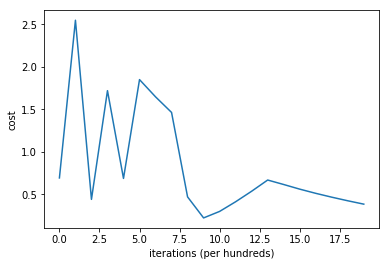

In [24]:
#plotting the costs
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.show()

In [25]:
for i in range(100):
    w=w_complete['w']
    b=w_complete['b']
    pred_25=predict(w,b,train_x_2[:,i].reshape(train_x_2[:,i].shape[0],1))
    print('actual value is {} predicted value is {}'.format(train_orig_y_2[0][i],pred_25))
    #calculation of test accuracy:
    

actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 1.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted value is [[0.]]
actual value is 0.0 predicted valu

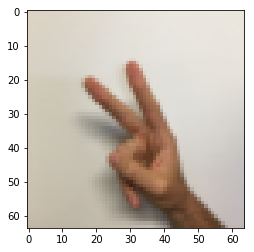

In [83]:
#checking for the correctness of dataset
list_2_train=[]
list_2_test=[]
for i in range(train_orig_y_2.shape[1]):
    if (train_orig_y_2[0][i]==1.0):
        list_2_train.append(i)
for j in range(test_orig_y_2.shape[1]):
    if(test_orig_y_2[0][j]==1.0):
        list_2_test.append(j)
plt.imshow(test_x_2[:,list_2_test[8]].reshape((64,64,3)))

In [ ]:
#Now need to map hidden layers to this dataset 
# train_x=train_x_2
# train_y=train_orig_y_2
# test_x=test_x_2
# test_y=test_orig_y_2

In [109]:
#now creating neural network with Single Hidden layer with 4 neurons


def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = 1 # size of output layer

    return (n_x, n_h, n_y)
# def initialize_parameters(n_x, n_h, n_y):
#     W1=np.random.randn(n_h,n_x)*0.01
#     b1=np.zeros([n_h,1])
#     W2=np.random.randn(n_y,n_h)*0.01
#     b2=np.zeros([n_y,1])
#     parameters = {"W1": W1,
#                   "b1": b1,
#                   "W2": W2,
#                   "b2": b2}
#     return parameters
    
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    Z1 = (np.dot(W1,X)+b1)
    A1 = np.(Z1)
    Z2 = (np.dot(W2,A1)+b2)
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache
# def compute_cost(A2,Y,parameters):
#     m=Y.shape[1]
#     logprobs = (np.multiply(Y,np.log(A2))+np.multiply(1-Y,np.log(1-(A2))))
#     cost = -np.sum(logprobs)/m
#     cost = np.squeeze(cost) 
#     return cost

def backward_propagation(parameters,cache,X,Y):
    m=X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    dZ2 = A2-Y
    dW2 = (np.dot(dZ2,A1.T))/m
    db2 = (np.sum(dZ2,axis=1,keepdims=True))/m
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (np.dot(dZ1,X.T))/m
    db1 = (np.sum(dZ1,axis=1,keepdims=True))/m
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads
# def update_parameters(parameters, grads, learning_rate=1.2):
#     W1 = parameters['W1']
#     b1 = parameters['b1']
#     W2 = parameters['W2']
#     b2 = parameters['b2']
#     dW1 = grads['dW1']
#     db1 = grads['db1']
#     dW2 = grads['dW2']
#     db2 = grads['db2']
#     W1 = W1-learning_rate*dW1
#     b1 = b1-learning_rate*db1
#     W2 = W2-learning_rate*dW2
#     b2 = b2-learning_rate*db2
#     parameters = {"W1": W1,
#               "b1": b1,
#               "W2": W2,
#               "b2": b2}
    
#     return parameters
def nn_model(X,Y,num_iterations = 10000, print_cost=True):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    n_h=4
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X,parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2,Y,parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters,cache,X,Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters,grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters
    
def predict(parameters,X):
    A2, cache = forward_propagation(X,parameters)
    predictions = A2>0.5
    return predictions    

In [117]:
# GRADED FUNCTION: linear_activation_forward
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if n on-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X,W1,b1,activation='relu')
        A2, cache2 = linear_activation_forward(A1,W2,b2,activation='sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2,Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2,cache2,activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1,cache1,activation='relu')
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters


def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A)+b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (np.dot(dZ,A_prev.T))/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

import numpy as np

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -(np.sum(np.multiply(Y,np.log(AL))+np.multiply((1-Y),np.log(1-AL))))/m
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current laylinear_activation_forwarder l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db"+str(l+1)]
    ### END CODE HERE ###
    return parameters


Cost after iteration 0: 0.6909447889515705
Cost after iteration 100: 0.5286279752548879
Cost after iteration 200: 0.5209773934658863
Cost after iteration 300: 0.5051888578662531
Cost after iteration 400: 0.4740155171125038
Cost after iteration 500: 0.4296491094084164
Cost after iteration 600: 0.45930843233176516
Cost after iteration 700: 0.43839787519714396
Cost after iteration 800: 0.4283539429712511
Cost after iteration 900: 0.4105835334300361
Cost after iteration 1000: 0.401062759468696
Cost after iteration 1100: 0.3899012272827242
Cost after iteration 1200: 0.380381483811354
Cost after iteration 1300: 0.3674810781089854
Cost after iteration 1400: 0.35488979627738204
Cost after iteration 1500: 0.3420639963825829
Cost after iteration 1600: 0.34008072662268585
Cost after iteration 1700: 0.3332844343050388
Cost after iteration 1800: 0.3278470853785655
Cost after iteration 1900: 0.3151601222803141
Cost after iteration 2000: 0.32688552613354127
Cost after iteration 2100: 0.29090893294910

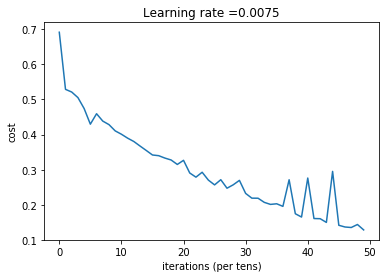

In [136]:
n_x=train_x_2.shape[0]
n_h=7
n_y=1
parameters = two_layer_model(train_x_2, train_orig_y_2, layers_dims = (n_x, n_h, n_y), num_iterations = 5000, print_cost=True)

In [129]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [137]:
p=predict(test_x_2,test_orig_y_2,parameters)

Accuracy: 0.825


In [210]:
len(np.squeeze(np.where(np.squeeze(p)==1)))
# plt.imshow(test_x_2[0].reshape(64,64,3))
# plt.imshow(np.squeeze(test_x_2)[0].reshape(64,64,3))

20

(array([  8,  28,  31,  35,  36,  44,  50,  53,  54,  55,  62,  70,  71,
         72,  74,  85,  87,  88,  96,  98, 100, 102, 103, 104, 106, 108,
        110, 111, 112, 126, 127, 129, 130, 136, 138, 140, 145, 147, 148,
        149, 153, 157, 163, 167, 169, 171, 173, 175, 183, 187, 190, 192,
        200, 203, 204, 210, 215, 218, 228, 237, 247, 257, 259, 263, 264,
        267, 268, 285, 292, 300, 301, 305, 310, 317, 318, 320, 322, 328,
        340, 343, 344, 346, 353, 356, 359, 370, 371, 376, 380, 383, 384,
        388, 401, 416, 417, 418, 419, 422, 423, 425, 430, 431, 438, 444,
        448, 453, 454, 458, 463, 466, 470, 472, 473, 475, 476, 478, 479,
        486, 489, 492, 495, 496, 500, 513, 521, 524, 529, 539, 540, 550,
        551, 566, 568, 571, 574, 582, 588, 591, 592, 593, 598, 604, 611,
        615, 616, 618, 621, 632, 633, 660, 674, 682, 693, 695, 710, 711,
        712, 713, 714, 715], dtype=int64),)

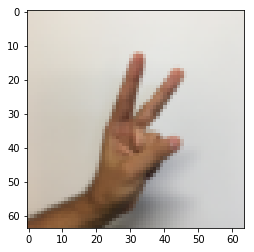

In [219]:
plt.imshow(train_x_2[:,175].reshape((64,64,3)))